In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Import the data from trouton.csv file
data = pd.read_csv('trouton.csv')

In [3]:
# Read the boiling point (TB) and enthalpies of vaporization (Hv)
TB = data['T_B (K)'].values
Hv = 4200 * data['H_v (kcal/mol)'].values # Convert kcal/mol to J/mol

In [4]:
# define objective function
def objective(params):
    a, b = params
    return np.sum((Hv - (a * TB + b))**2) # Sum of squared residuals

In [5]:
initial_guess = [1, 1] # Initial guess a = 1, b = 1

# Compute optimized a and b
result = minimize(objective, initial_guess) 
a_optimized, b_optimized = result.x

# Compare the slope (a) from the numerical optimization with the slope obtained from the linear regression in the first problem.
print(f"Slope (a) optimized by linear regression is 104.2520 J/mol; slope (a) optimized by numerical optimization is {a_optimized:.4f} kJ/mol, and their difference is {104.2520 - a_optimized:.4f} J/mol")

# Discuss the implications of using an optimization-based approach versus a linear regression approach for this problem
print("Discussion: Numerical optimization optimizes slope (a) and intercept (b) by minimizing the sum of squared residuals, while linear regression directively optimizes the parameters. I think numerical optimization is more flexible espicially when it comes to more complex or non-linear relationships. On the other hand, linear regression is more efficient for solving linear models, however, it is limited to linear relationships.")

Slope (a) optimized by linear regression is 104.2520 J/mol; slope (a) optimized by numerical optimization is 104.2520 kJ/mol, and their difference is -0.0000 J/mol
Discussion: Numerical optimization optimizes slope (a) and intercept (b) by minimizing the sum of squared residuals, while linear regression directively optimizes the parameters. I think numerical optimization is more flexible espicially when it comes to more complex or non-linear relationships. On the other hand, linear regression is more efficient for solving linear models, however, it is limited to linear relationships.


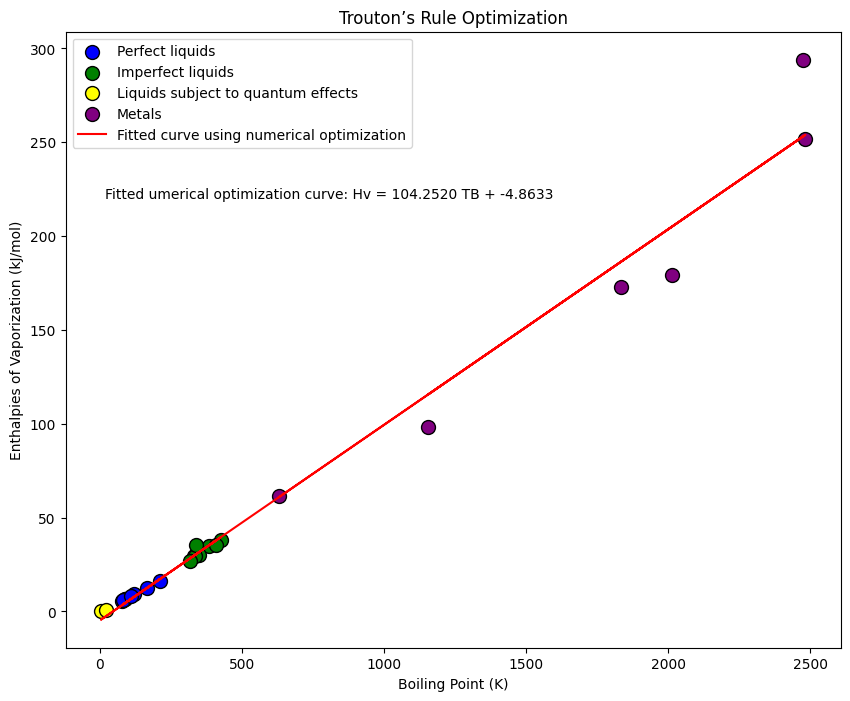

In [6]:
Hv_predict = (a_optimized * TB + b_optimized) # Fitted numerical optimization model
Hv_predict_kJ = Hv_predict/1000 # Convert J/mol to kJ/mol

# Assign colors to different Classes.
class_labels = data['Class'].unique()
colors = ['blue', 'green', 'yellow', 'purple']
class_to_color = {cls: colors[i] for i, cls in enumerate(class_labels)}
data['color'] = data['Class'].map(class_to_color)

plt.figure(figsize=(10, 8))

for cls in class_labels:
    class_data = data[data['Class'] == cls]
    plt.scatter(class_data['T_B (K)'], 4.2*class_data['H_v (kcal/mol)'], # Convert kcal/mol to kJ/mol
                color=class_to_color[cls], label = cls, s = 100, edgecolor = 'black') # Color data points by their Class

plt.plot(TB, Hv_predict_kJ, color='red', label='Fitted curve using numerical optimization') # Plot fitted curve
plt.text(20, 220, f"Fitted umerical optimization curve: Hv = {a_optimized:.4f} TB + {b_optimized/1000:.4f}") # Display the equation
plt.xlabel('Boiling Point (K)')
plt.ylabel('Enthalpies of Vaporization (kJ/mol)')
plt.title('Trouton’s Rule Optimization')
plt.legend()
plt.savefig('troutons_rule_optimization.png')
plt.show()
